<a href="https://colab.research.google.com/github/salazarcristian1014/Bank-Customer-Data-Preparation/blob/main/Bank_Customer_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Churn_Messy.xlsx to Bank_Churn_Messy.xlsx


Lo primero que hacemos es leer el archivo que tenemos en nuestro PC, y lo traemos a Coolab.

***The first thing we do is read the file we have on our PC and bring it to Colab.***

In [4]:
churn_cust_info = pd.read_excel('Bank_Churn_Messy.xlsx')
churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


Leemos nuestro segundo archivo.

***We read our second file.***

In [5]:
churn_acct_info = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name=1)
churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


Ahora vamos a utilizar un leftjoin para unir "account_info" y "customer_info" por medio del "customer_ID"

***Now we are going to use a left join to merge 'account_info' and 'customer_info' using 'customer_ID'.***

In [6]:
churn_df = churn_cust_info.merge(churn_acct_info, how='left', on = 'CustomerId')
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


Ahora eliminamos columnas que estan duplicadas, en este caso ternure_x y ternure_y Eliminaremos una de estas, tambien eliminaremos los valores duplicados.

***Now we are removing duplicate columns, in this case, tenure_x and tenure_y. We will delete one of them, and we will also remove the duplicate values.***

In [8]:
churn_df = churn_df.drop('Tenure_y',axis=1).rename({'Tenure_x':'Ternure'}, axis=1)

In [9]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [10]:
churn_df = churn_df.drop_duplicates()

In [11]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Ternure          10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


Ahora vamos a proceder a limpiar nuestro dataset.

***Now we are going to proceed to clean our dataset.***


Primero retiramos el simbolo "€" y convertimos la columna de tipo Object a tipo float.

***First, we remove the '€' symbol and convert the column from Object type to float type.***

In [12]:
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].str.replace('€',"").astype('float')

<ipython-input-12-4d4bd1cbcbae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].str.replace('€',"").astype('float')


In [13]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Ternure          10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


hacemos el mismo proceso anterior con nuestra columna "Balance"

***We apply the same process as before to our 'Balance' column.***

In [14]:
churn_df['Balance'] = churn_df['Balance'].str.replace('€',"").astype('float')

<ipython-input-14-8574af9b82f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['Balance'] = churn_df['Balance'].str.replace('€',"").astype('float')


In [15]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Ternure          10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


Ahora reemplazamos los valores faltantes en las columnas categoricas y en las columnas numericas usaremos la media para llenar valores faltantes.

***Now we replace the missing values in the categorical columns, and for the numerical columns, we will use the mean to fill the missing values.***

In [16]:
churn_df[churn_df.isna().any(axis=1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [17]:
churn_df = churn_df.fillna(value={'Surname': 'MISSING', 'Age': churn_df['Age'].median()})

In [18]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Ternure          10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


Revisamos que los valores en las columnas que tenian datos en blanco o datos nulos se imputen correctamente.

***We check that the values in the columns that had blank or null data are imputed correctly.***

In [19]:
churn_df.iloc[[28,121,9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


Una vez tenemos nuestra base de datos limpia sin valores en blanco o valores nulos, vamos a perfilar los valores numericos de nuestro dataset.

***Once we have our clean database with no blank or null values, we will profile the numerical values in our dataset.***

In [20]:
churn_df.describe()

,CustomerId,CreditScore,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


la columna "EstimatedSalary" tiene un valor negativo, lo cual no tiene sentido ya que el salario de una persona debe ser positivo por minimo que sea. Asi que procedemos a reemplazar valores.

***The "EstimatedSalary" column contains a negative value, which doesn't make sense since a person's salary should be positive, no matter how small. Therefore, we proceed to replace these values.***

In [21]:
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].replace(-999999, churn_df['EstimatedSalary'].median())

In [22]:
churn_df.describe()

,CustomerId,CreditScore,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


Ahora vamos a organizar nuestra columna "Geography" ya que algunas filas aparece por ejemplo: "FRA" y otras "FRANCE" o "FRENCH". Vamos a unicarlas de tal manera que quede solo una descripcion por pais.

***Now we are going to organize our 'Geography' column since some rows show "FRA" and "FRANCE" or "FRENCH". We will unify them so that there is only one description per country.***

In [23]:
churn_df['Geography'].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

In [24]:
churn_df['Geography'].value_counts()

,count
Geography,
Germany,2509
Spain,2477
France,1741
French,1655
FRA,1618


In [25]:
churn_df['Geography'] = np.where(churn_df['Geography'].isin(['FRA', 'French', 'France']),'France',churn_df['Geography'])

In [26]:
churn_df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


Procedemos a explorar la data, generando algunos graficos.

***We proceed to explore the data by generating some charts***

In [28]:
exited_counts = churn_df['Exited'].value_counts()

Text(0, 0.5, 'Número de Clientes')

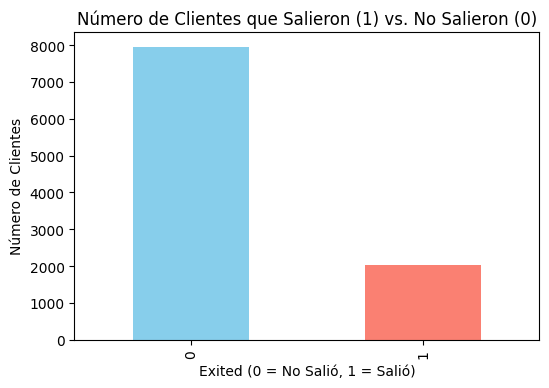

In [30]:
plt.figure(figsize=(6,4))
exited_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Número de Clientes que Salieron (1) vs. No Salieron (0)')
plt.xlabel('Exited (0 = No Salió, 1 = Salió)')
plt.ylabel('Número de Clientes')

<Axes: xlabel='Geography', ylabel='Exited'>

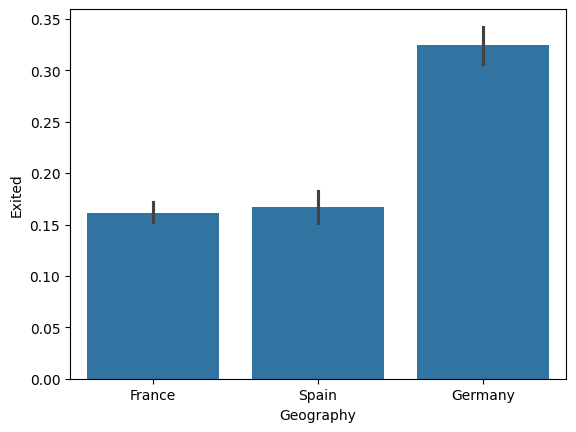

In [32]:
sns.barplot(data=churn_df, x='Geography', y='Exited')

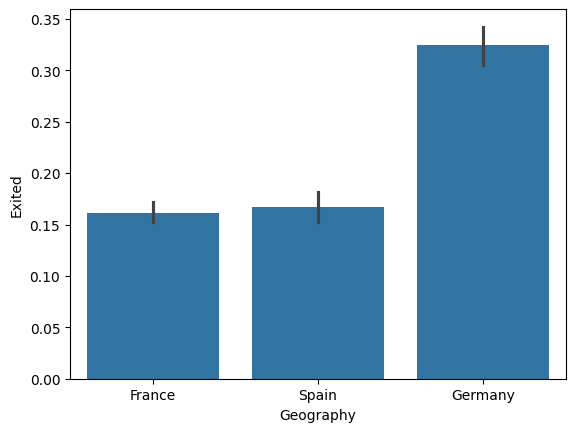

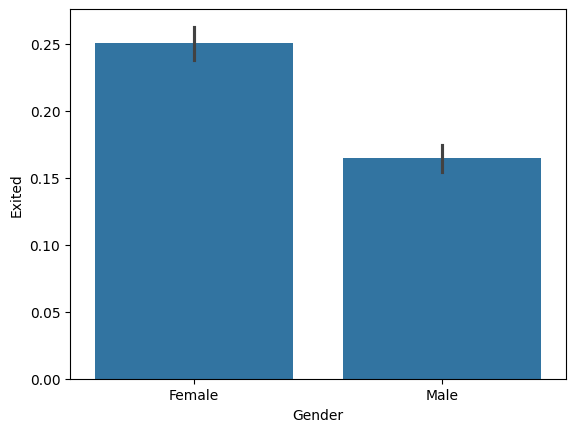

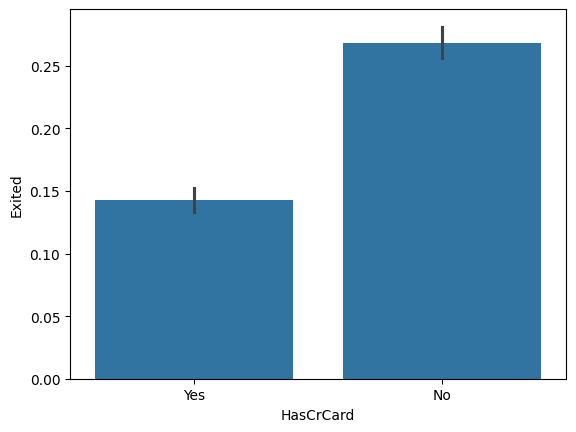

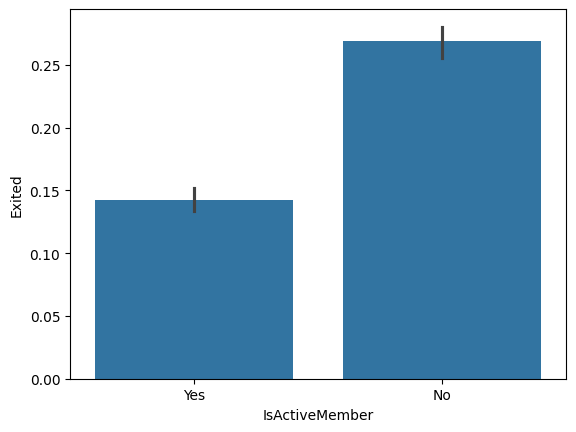

In [34]:
for col in churn_df.drop('Surname', axis =1).select_dtypes('object'):
  sns.barplot(data=churn_df, x=col, y='Exited')
  plt.show()


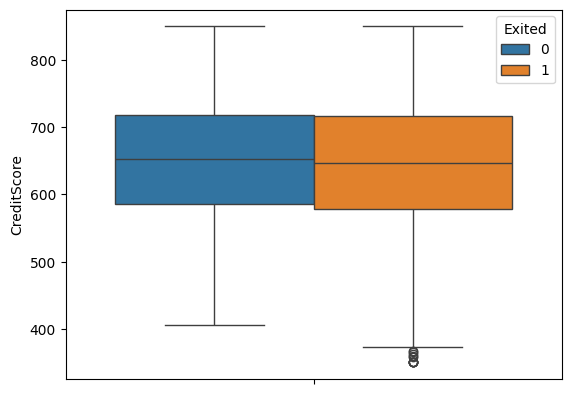

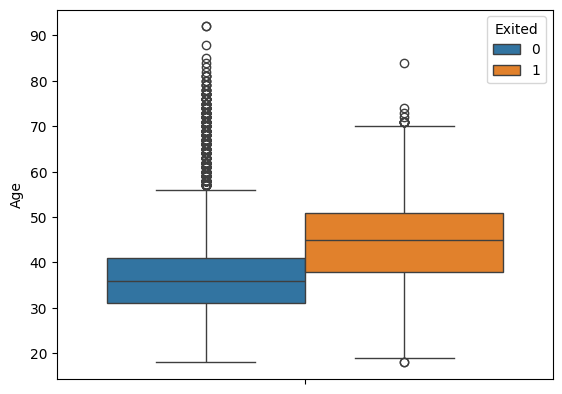

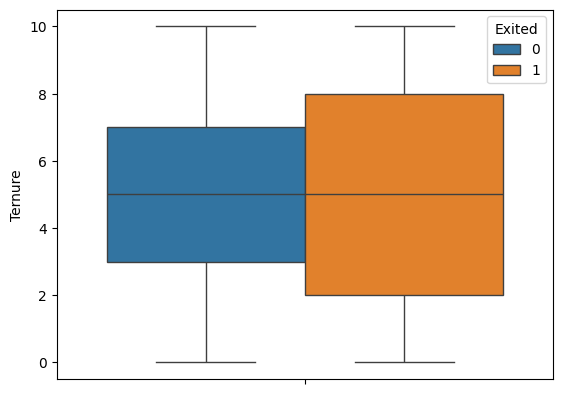

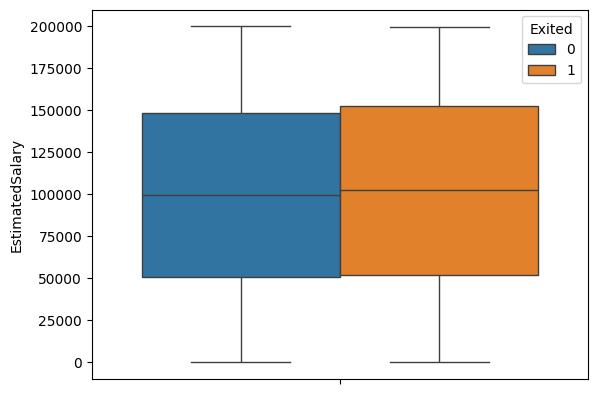

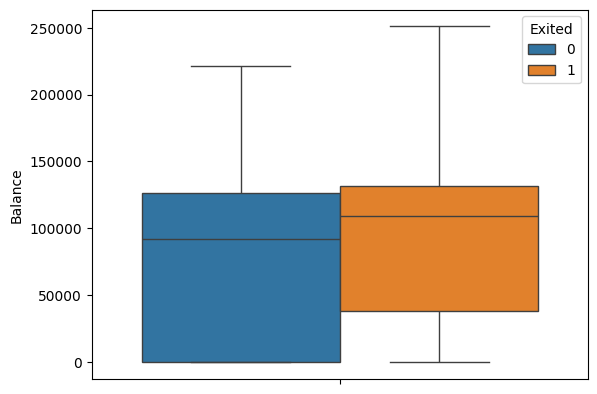

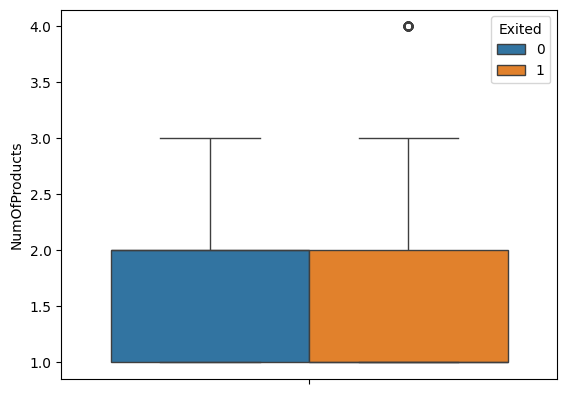

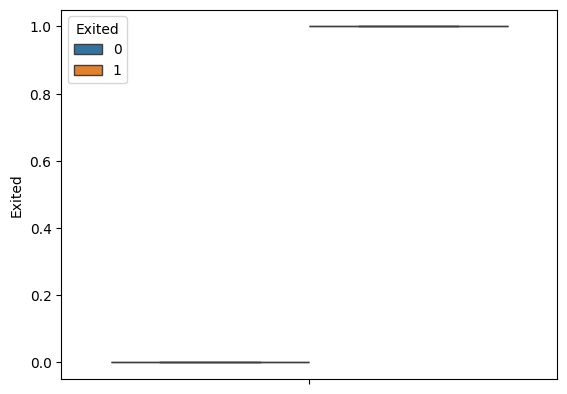

In [35]:
for col in churn_df.drop('CustomerId', axis =1).select_dtypes('number'):
  sns.boxplot(data=churn_df, y= col, hue = 'Exited')
  plt.show()

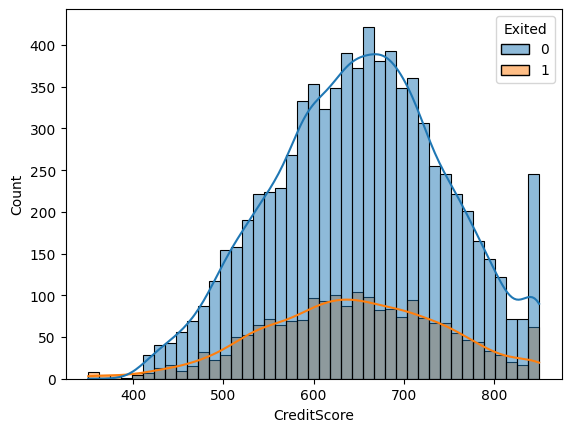

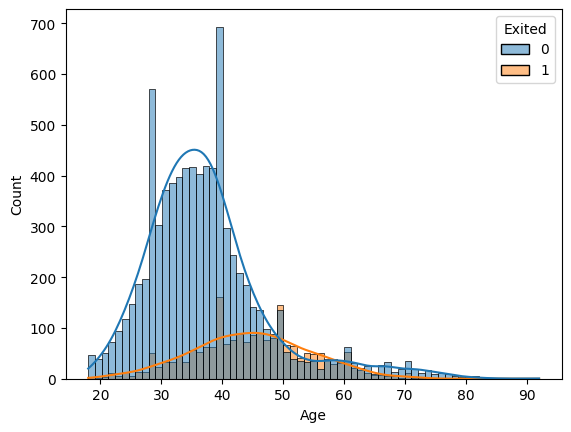

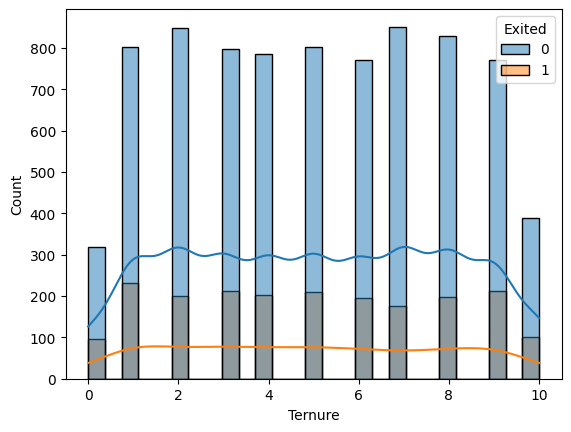

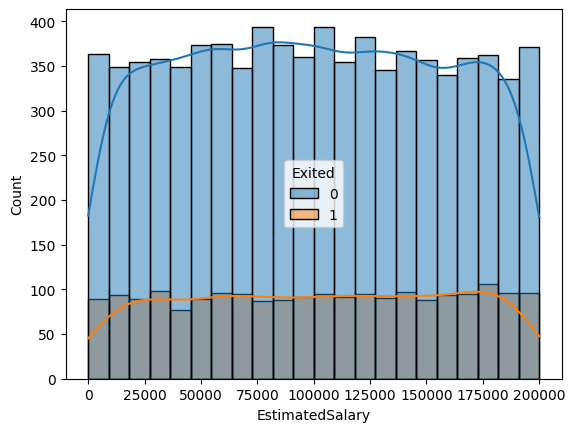

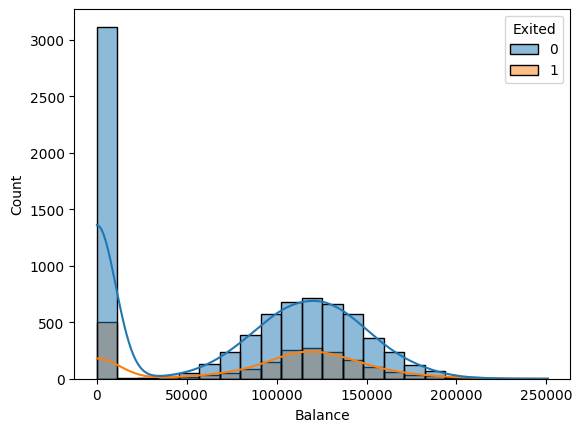

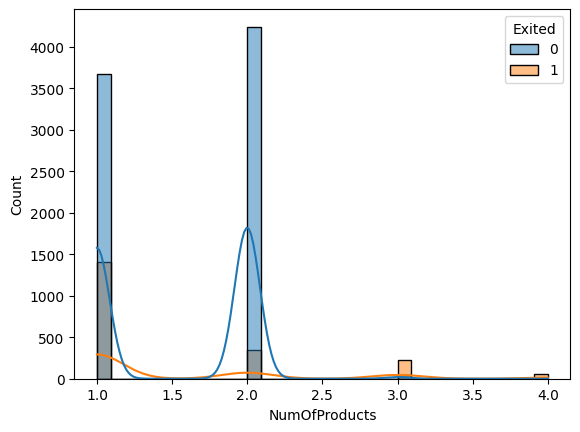

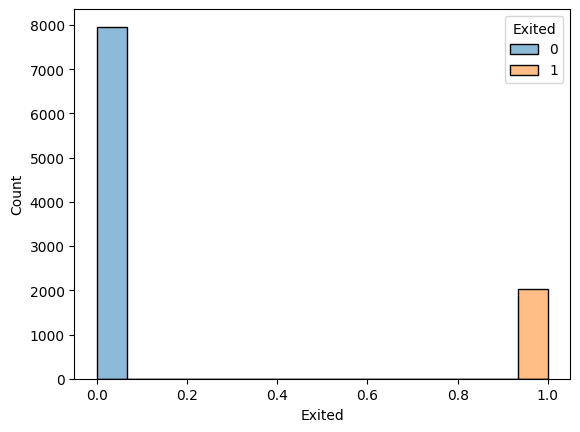

In [39]:
for col in churn_df.drop('CustomerId', axis =1).select_dtypes('number'):
  sns.histplot(data=churn_df, x= col, hue = 'Exited', kde = True)
  plt.show()

Preparamos nuestros datos para el modelado, eliminamos las columnas que no ejerceran ninguna funcion como por ejemplo CostumerId, etc

***We prepare our data for modeling by removing columns that will not serve any function, such as CustomerId. ***

In [41]:
modellin_df = churn_df.drop(['CustomerId', 'Surname'], axis=1)
modellin_df.head()

,CreditScore,Geography,Gender,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


creamos variable ficticias para los campos categoricos.


***We create dummy variables for the categorical fields***

In [42]:
modellin_df = pd.get_dummies(modellin_df, drop_first=True)
modellin_df.head()

,CreditScore,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True


In [45]:
modellin_df['Balance_v_Sale'] = modellin_df['Balance']/modellin_df['EstimatedSalary']
modellin_df.head()

,CreditScore,Age,Ternure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sale
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055


<Axes: ylabel='Balance_v_Sale'>

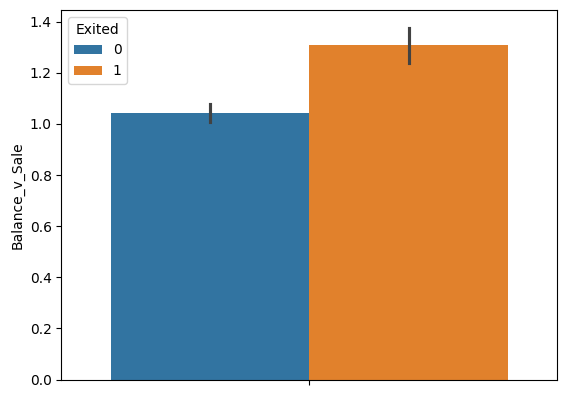

In [46]:
sns.barplot(data=modellin_df.query('Balance_v_Sale < 10'), y='Balance_v_Sale', hue = 'Exited')